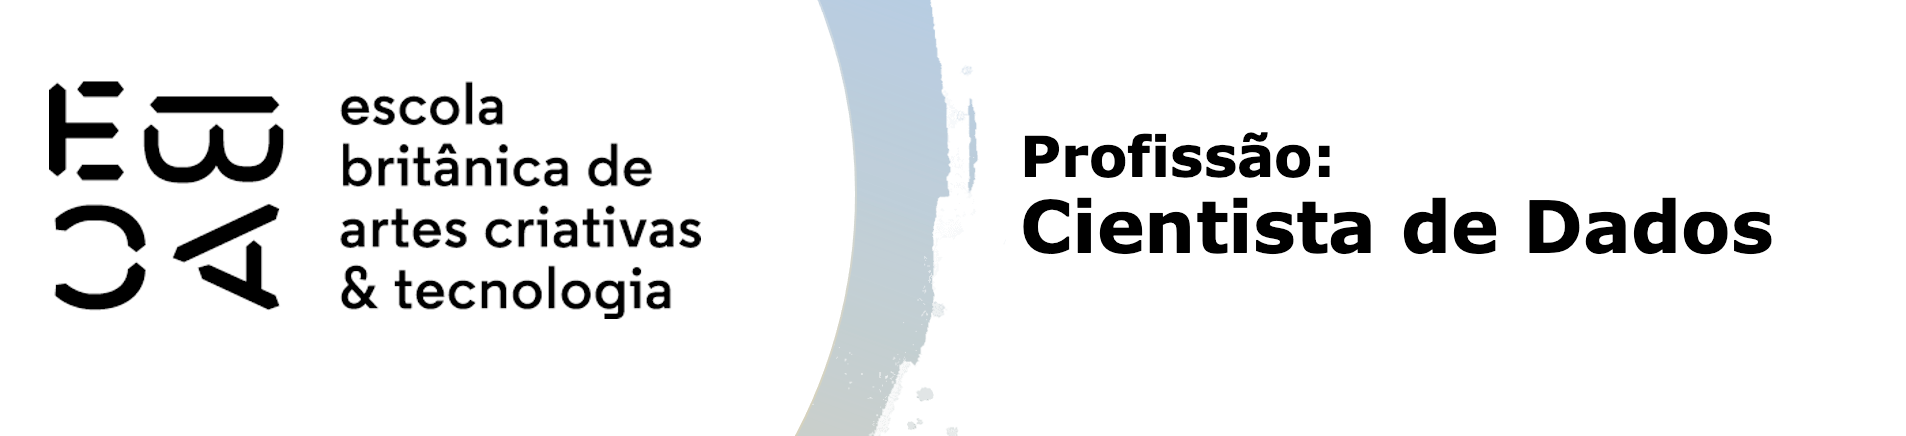

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:

df = pd.read_csv('./Dados/previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
df.loc[df['tempo_emprego'].isna(), 'tempo_emprego'] = df['tempo_emprego'].mean()

In [4]:
df.reset_index(inplace=True)
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.drop(columns=['index', 'level_0'], inplace=True)

In [5]:
first_year = df['data_ref'].dt.year.min()
last_date = df['data_ref'].iat[-1]
is_test = df['data_ref'] >= last_date - pd.Timedelta(days=3*30)
df_test = df[is_test].copy()
df = df[~is_test]

In [6]:
df['log_renda'] = np.log(df['renda'])
df_test['log_renda'] = np.log(df_test['renda'])

In [7]:
reg_formula = 'log_renda ~ tempo_emprego + idade + sexo + posse_de_imovel + tipo_renda + educacao'
reg = smf.ols(reg_formula, data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 3.890e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:03:09   Log-Likelihood:            -7.9758e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599987   BIC:                         1.595e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.8851      0.013    620.341      0.000       7.860       7.910
sexo[T.M]                           0.1364      0.003     52.459      0.000       0.131       0.142
posse_de_imovel[T.S]                0.1837      0.003     72.330      0.000       0.179       0.189
tipo_renda[T.Bolsista]             -0.2233      0.052     -4.258      0.000      -0.326      -0.121
tipo_renda[T.Empresário]            0.1447      0.003     48.483      0.000       0.139       0.151
tipo_renda[T.Pensionista]          -0.2974      0.004    -70.122      0.000      -0.306      -0.289
tipo_renda[T.Servidor público]      0.1324      0.004     30.089      0.000       0.124       0.141
educacao[T.Médio]                   0.0312      0.011      2.788      0.005       0.009       0.053
educacao[T.Pós graduação]           0.1551      0.038      4.069      0.000       0.080       0.230
educacao[T.Superior completo]       0.1243      0.011     10.999      0.000       0.102       0.146
educacao[T.Superior incompleto]     0.0456      0.013      3.601      0.000       0.021       0.070
tempo_emprego                       0.1289      0.000    620.339      0.000       0.129       0.129
idade                               0.0039      0.000     26.807      0.000       0.004       0.004
==============================================================================
Omnibus:                     1091.299   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              961.281
Skew:                          -0.053   Prob(JB):                    1.82e-209
Kurtosis:                       2.835   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

In [8]:
df_test['pred'] = reg.predict(df_test)
df_test['resid'] = df_test['log_renda'] - df_test['pred']

df['pred'] = reg.predict(df)
df['resid'] = df['log_renda'] - df['pred']

<Axes: ylabel='Count'>

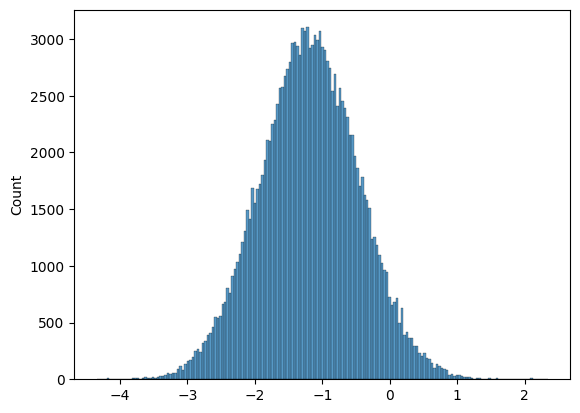

In [9]:
sns.histplot(df_test['log_renda'] - df_test['pred'])

In [10]:
(df_test['pred'] - df_test['log_renda']).mean()

1.1895882777720819

<Axes: xlabel='pred', ylabel='log_renda'>

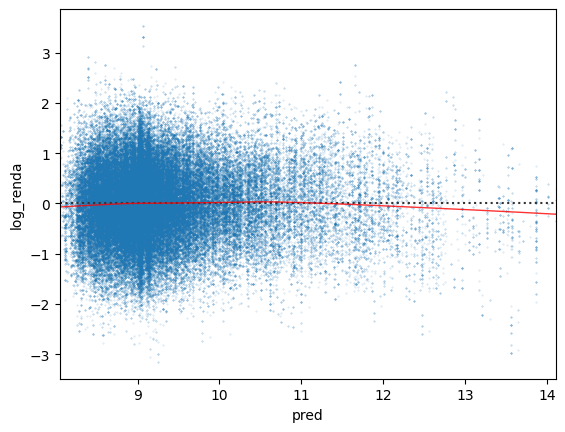

In [11]:
sns.residplot(
    data=df_test,
    x='pred',
    y='log_renda',
    lowess=True,
    scatter_kws={'alpha': 0.25, 's':.1},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)

<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

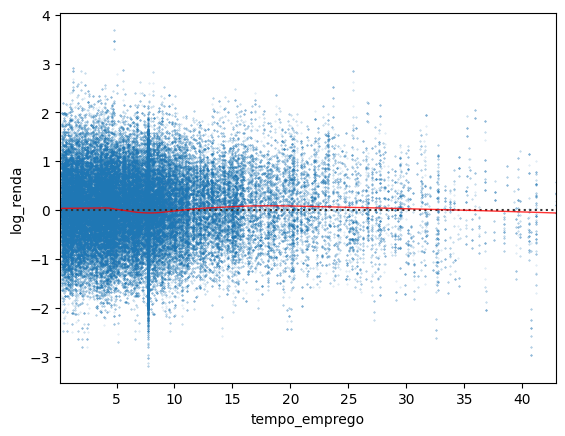

In [12]:
sns.residplot(
    data=df_test,
    x='tempo_emprego',
    y='log_renda',
    lowess=True,
    scatter_kws={'alpha': 0.25, 's':.1},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)

<Axes: xlabel='idade', ylabel='log_renda'>

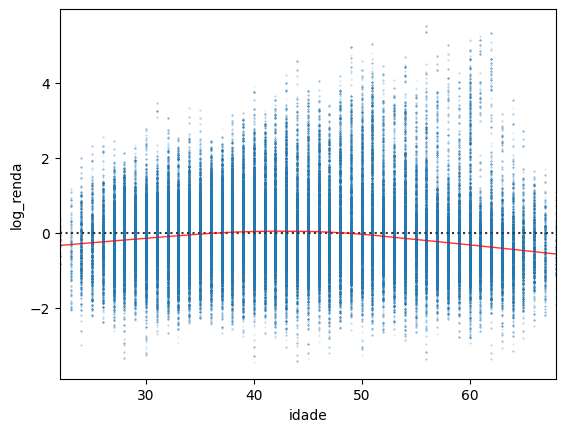

In [13]:
sns.residplot(
    data=df_test,
    x='idade',
    y='log_renda',
    lowess=True,
    scatter_kws={'alpha': 0.25, 's':.1},
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)

<Axes: xlabel='sexo', ylabel='resid'>

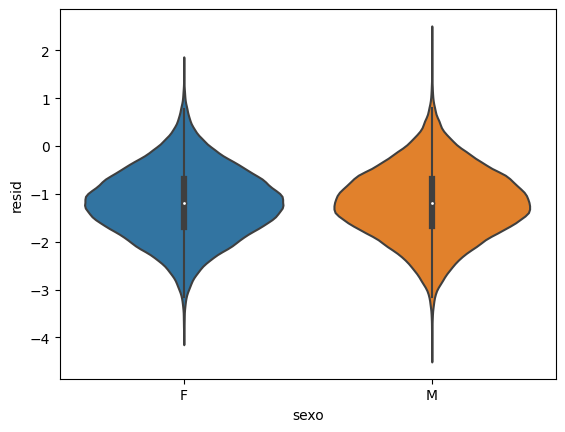

In [14]:
sns.violinplot(
    data=df_test,
    x='sexo',
    y='resid'
)

<Axes: xlabel='posse_de_imovel', ylabel='resid'>

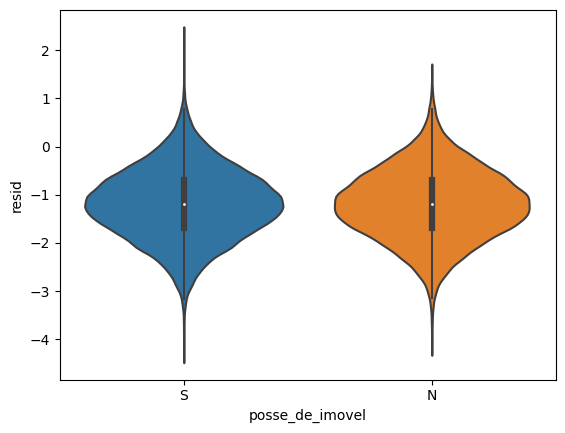

In [15]:
sns.violinplot(
    data=df_test,
    x='posse_de_imovel',
    y='resid'
)

<Axes: xlabel='tipo_renda', ylabel='resid'>

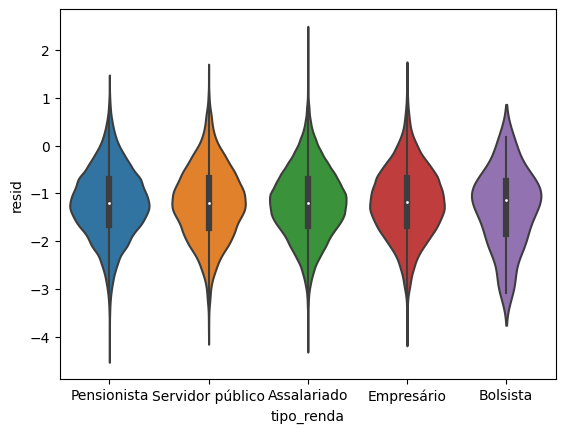

In [16]:
sns.violinplot(
    data=df_test,
    x='tipo_renda',
    y='resid'
)

<Axes: xlabel='educacao', ylabel='resid'>

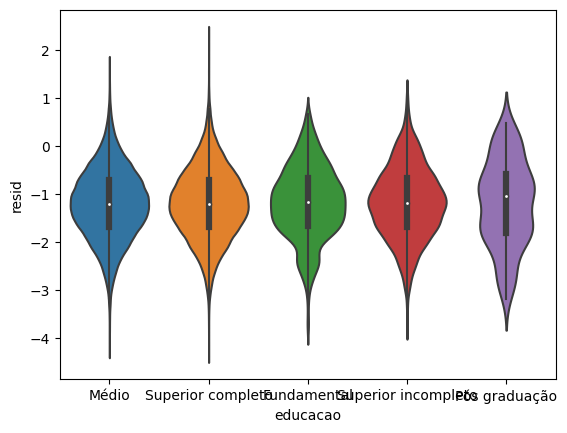

In [17]:
sns.violinplot(
    data=df_test,
    x='educacao',
    y='resid'
)

In [18]:
df_test['mes'] = df_test['data_ref'].dt.month + (df_test['data_ref'].dt.year - first_year) * 12
df['mes'] = df['data_ref'].dt.month + (df['data_ref'].dt.year - first_year) * 12

<Axes: xlabel='mes', ylabel='resid'>

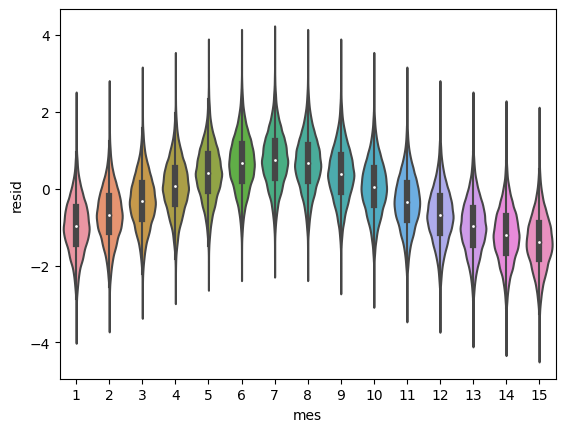

In [19]:
sns.violinplot(
    data=pd.concat((df, df_test)),
    x='mes',
    y='resid'
)

Como podemos ver, os resíduos possuem distribuição normal. Todavia, há uma relação de dependência com relação ao mês de referência. Isso explica o viés do erro na base de testes!

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

Como a função outlier_test() é muito lenta, precisamos fazer uma nova regressão a partir de uma amostra dos dados originais. $n=2^{15}$ computa em um tempo razoável na minha máquina.

In [40]:
reg_sample = smf.ols(reg_formula, data=df.sample(n=32768)).fit()

In [41]:
st_res = reg_sample.outlier_test().student_resid

<Axes: ylabel='student_resid'>

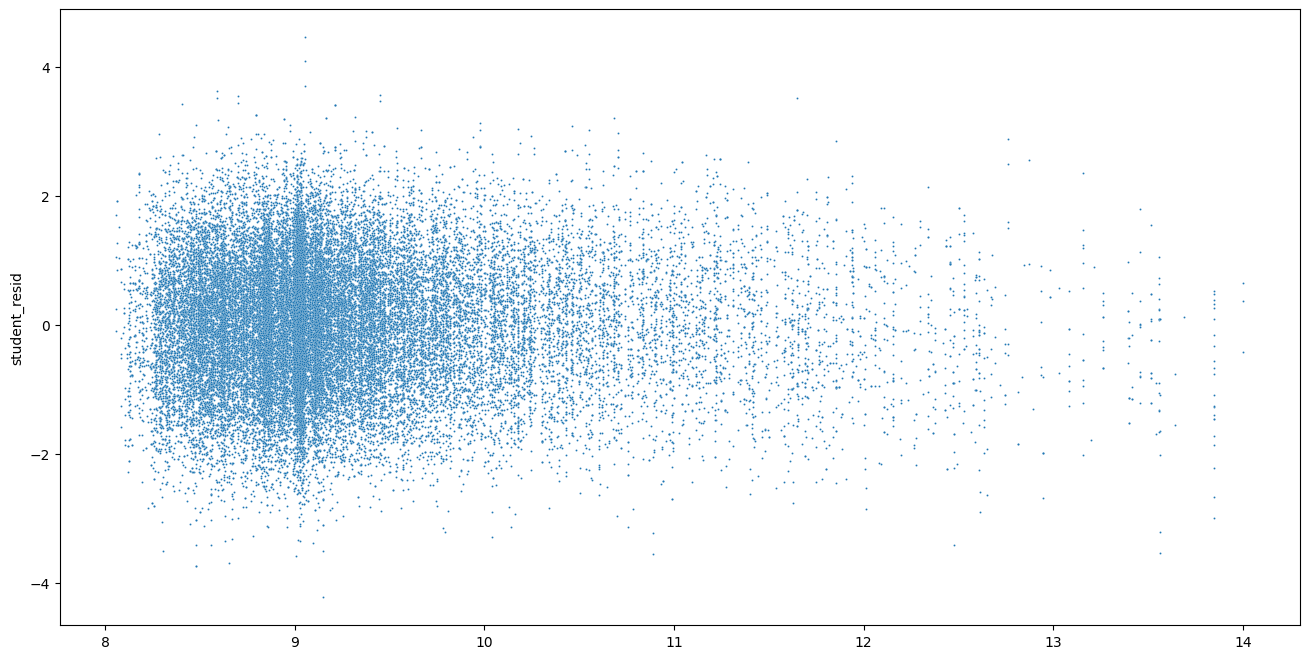

In [70]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(x=reg_sample.predict(), y=st_res, alpha=1, s=2, ax=ax)

Há cerca de três pontos em que $|res_{st}| >= 4$. Apesar de ter resíduos tão altos, não perecem interferir no modelo significativamente. Vamos ver o que o gráfico de influências nos diz:

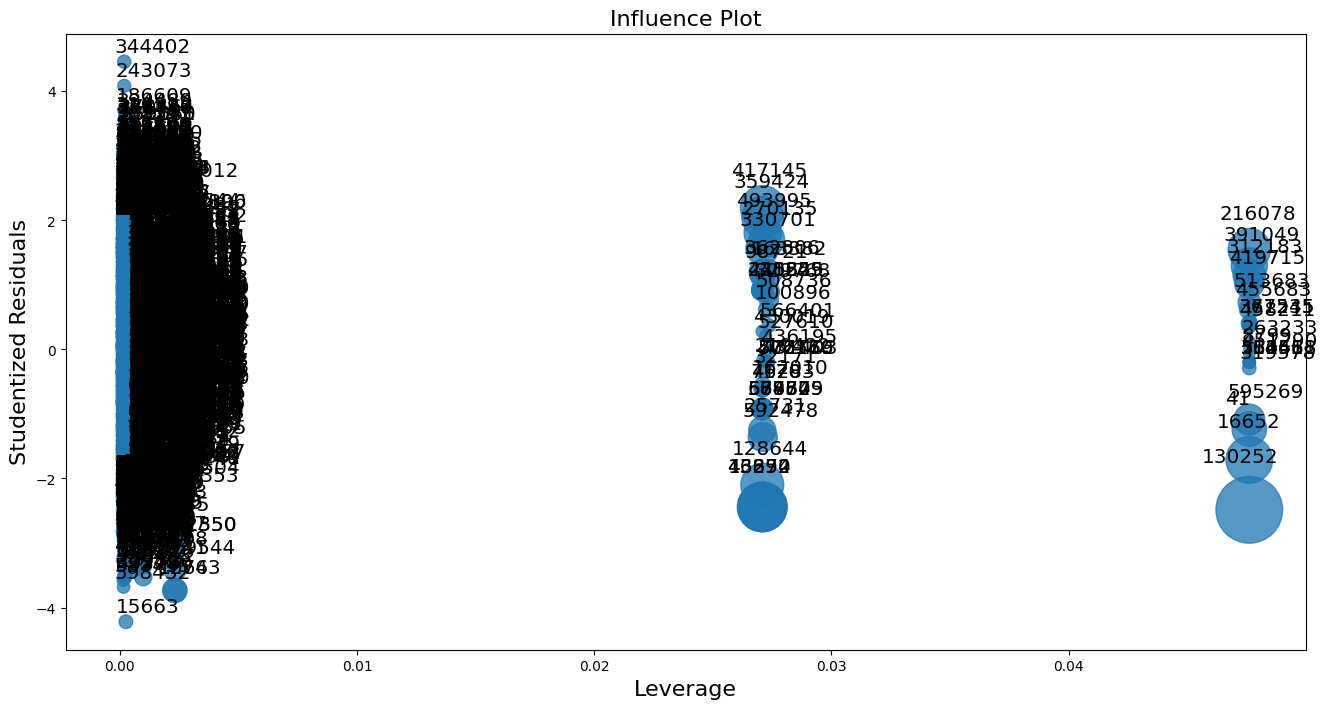

In [69]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(16, 8))
fig = influence_plot(reg_sample, criterion='cooks', ax=ax)
#fig.tight_layout(pad=1.0)

Como podemos ver, os pontos com maior resíduo *estudentizado* estão muito próximos à média, poranto, têm pouca alavancagem. Porém, temos alguns pontos com uma influência razoável. Será que valeria a pena removê-los?

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [ ]:
num_vars = [
    'tempo_emprego', 
    'idade'
]
cat_vars = [
    'sexo', 
    'posse_de_imovel', 
    'tipo_renda', 
    'educacao'
]
df[num_vars].corr()

,tempo_emprego,idade
tempo_emprego,1.00000,0.25193
idade,0.25193,1.00000


In [ ]:
df[num_vars].corr(method='spearman')

,tempo_emprego,idade
tempo_emprego,1.000000,0.301418
idade,0.301418,1.000000


In [ ]:
df_dum = pd.get_dummies(df[cat_vars + num_vars], drop_first=True)
#df_dum.head()

In [ ]:
vars_vif = pd.DataFrame()
vars_vif['VIF Factor'] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif['Feature'] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,3.01,tempo_emprego
1,25.13,idade
2,1.55,sexo_M
3,3.07,posse_de_imovel_S
4,1.00,tipo_renda_Bolsista
5,1.46,tipo_renda_Empresário
6,2.12,tipo_renda_Pensionista
7,1.20,tipo_renda_Servidor público
8,13.96,educacao_Médio
9,1.02,educacao_Pós graduação


As variáveis com maior VIF são *idade* e *educacao_médio*. A última é uma dummy de uma variável categórica importante para o modelo, portanto, não vamos tratr delo por enquanto. Quanto à idade, já podemos concluir que possui uma correlação razoável com *tempo_emprego*, o que faz sentido. Isso porque $idade = tempo\_emprego + idade\_emprego$, sendo que $idade\_emprego = idade - tempo\_emprego$.

In [ ]:
import scipy.stats as ss 

def cramer_v_raw(x,y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
        return result

In [ ]:
def cramer_v(x, y, max_cat=5):
    if (np.dtype(x) in {np.dtype('float64'), np.dtype('int64')}) \
        and (len(np.unique(x)) > max_cat):
            x_ = pd.qcut(x, max_cat)
#             print('#########')
    else: x_ = x
    if (np.dtype(y) in {np.dtype('float64'), np.dtype('int64')}) \
        and (len(np.unique(y)) > max_cat):
            y_ = pd.qcut(y, max_cat)
    else: y_ = y
    return cramer_v_raw(x_ ,y_)

In [ ]:
vars = num_vars + cat_vars
cramer_mat = pd.DataFrame(
    np.zeros( ((len(vars)), len(vars)) ),
    columns=vars,
    index=vars
)

for var1 in vars:
    for var2 in vars:
        cramer_mat.loc[var1, var2] = cramer_v(df[var1], df[var2])

In [ ]:
cramer_mat

,tempo_emprego,idade,sexo,posse_de_imovel,tipo_renda,educacao
tempo_emprego,1.000000,0.291413,0.157900,0.078671,0.366814,0.059312
idade,0.291413,1.000000,0.212354,0.134602,0.369565,0.115087
sexo,0.157900,0.212354,1.000000,0.055238,0.190153,0.021655
posse_de_imovel,0.078671,0.134602,0.055238,1.000000,0.098883,0.056585
tipo_renda,0.366814,0.369565,0.190153,0.098883,1.000000,0.093570
educacao,0.059312,0.115087,0.021655,0.056585,0.093570,1.000000


Pela matriz de coeficientes V de Cramer, podemos ver que *tipo_renda* possui uma relação de multicolinearidade ainda mais forte com a *idade*.

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

#### Ouliers

Decidi por não remover outliers pelos seguintes motivos:
1. O conjunto de dados é muito grande, o que diminui a probabilidade da remoção de outliers melhorar o modelo amostra.
2. Graças ao motivo anterior, a análise de outliers teve que ser feita em uma amostra dos pontos. Isso dificulta a remoção de outliers similares fora da amostra.
3. Os pontos de maior influência encontrados possuem influência razoável e estão relativamente bem dstribuidos.

#### Dependência

Primeiro, vamos resolver o problema da dependência entre os resíduos e mês de referência. Para isso, vamos extrair a média do $log(renda)$ para cada mês.

In [ ]:
log_renda_mes = pd.concat((df, df_test)).groupby('mes')['log_renda'].mean()
df['log_renda_mes'] = df['mes'].map(log_renda_mes)
df_test['log_renda_mes'] = df_test['mes'].map(log_renda_mes)

A partir daqui, temos duas opções: usar *log_renda_mes* como variável explicativa ou substituir a variável resposta por *delta_log_renda*, sendo que $delta\_log\_renda = log\_renda - log\_renda\_mes$. A vantagem da segunda opção é que, além de permitir prever a renda a partir da estimativa da média mensal, possibilita comparar clientes entre si sem a necessidade de tal estimativa.

In [ ]:
df['delta_log_renda'] = df['log_renda'] - df['log_renda_mes']
df_test['delta_log_renda'] = df_test['log_renda'] - df_test['log_renda_mes']

#### Multicolinearidade

Agora, vamos substituir a variável explicativa *idade* por *idade_emprego*.

In [ ]:
df['idade_emprego'] = df['idade'] - df['tempo_emprego']
df_test['idade_emprego'] = df_test['idade'] - df_test['tempo_emprego']

Enfim, calculamos a diferença entre *idade_emprego* e *idade_emprego_tr*, sendo que *idade_emprego_tr* é a média de *idade_emprego* por *tipo_renda*.

In [ ]:
idade_emprego_tr = pd.concat((df, df_test)).groupby('tipo_renda')['idade_emprego'].mean()
df['idade_emprego_tr'] = df['tipo_renda'].map(idade_emprego_tr)
df_test['idade_emprego_tr'] = df_test['tipo_renda'].map(idade_emprego_tr)

In [ ]:
df['delta_idade_emprego'] = df['idade_emprego'] - df['idade_emprego_tr']
df_test['delta_idade_emprego'] = df_test['idade_emprego'] - df_test['idade_emprego_tr']

Agora, vamos avaliar se os ajustes feitos melhoraram o modelo:

In [ ]:
num_vars = [
    'tempo_emprego', 
    'delta_idade_emprego'
]
cat_vars = [
    'sexo', 
    'posse_de_imovel', 
    'tipo_renda', 
    'educacao'
]

In [ ]:
df_dum = pd.get_dummies(df[cat_vars + num_vars], drop_first=True)

vars_vif = pd.DataFrame()
vars_vif['VIF Factor'] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif['Feature'] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,3.14,tempo_emprego
1,1.20,delta_idade_emprego
2,1.56,sexo_M
3,3.03,posse_de_imovel_S
4,1.00,tipo_renda_Bolsista
5,1.46,tipo_renda_Empresário
6,1.37,tipo_renda_Pensionista
7,1.20,tipo_renda_Servidor público
8,4.51,educacao_Médio
9,1.01,educacao_Pós graduação


Problema da multicolinearidade resolvido! Note que até a dummy *educacao_Médio* dexou de ter um VIF tão alto!

In [ ]:
formula = f"delta_log_renda ~ {' + '.join(num_vars + cat_vars)}"
reg_b = smf.ols(formula, data=df).fit()
reg_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        delta_log_renda   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                 6.329e+04
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        15:35:55   Log-Likelihood:            -6.5264e+05
No. Observations:              600000   AIC:                         1.305e+06
Df Residuals:                  599987   BIC:                         1.305e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.2585      0.009   -139.285      0.000      -1.276      -1.241
sexo[T.M]                           0.1366      0.002     66.877      0.000       0.133       0.141
posse_de_imovel[T.S]                0.1833      0.002     91.884      0.000       0.179       0.187
tipo_renda[T.Bolsista]             -0.2359      0.041     -5.730      0.000      -0.317      -0.155
tipo_renda[T.Empresário]            0.1404      0.002     59.915      0.000       0.136       0.145
tipo_renda[T.Pensionista]          -0.2267      0.003    -84.680      0.000      -0.232      -0.221
tipo_renda[T.Servidor público]      0.1163      0.003     33.614      0.000       0.110       0.123
educacao[T.Médio]                   0.0107      0.009      1.216      0.224      -0.007       0.028
educacao[T.Pós graduação]           0.1379      0.030      4.607      0.000       0.079       0.197
educacao[T.Superior completo]       0.1438      0.009     16.204      0.000       0.126       0.161
educacao[T.Superior incompleto]     0.0453      0.010      4.554      0.000       0.026       0.065
tempo_emprego                       0.1331      0.000    791.055      0.000       0.133       0.133
delta_idade_emprego                 0.0041      0.000     36.442      0.000       0.004       0.004
==============================================================================
Omnibus:                       86.650   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.544
Skew:                          -0.006   Prob(JB):                     1.32e-20
Kurtosis:                       3.059   Cond. No.                         467.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
r2_score(df_test['delta_log_renda'], reg_b.predict(df_test))

0.5589812694405087

O novo $R^2$ na base de testes não só é ideêntico à nova base de treino com é muito melhor que o da base de treino anterior! Com isso, concluímos que os ajustes feitos aqui consertaram o modelo.